# Gradient Boosting Regressor Implementation
This work demonstrates the implementation of a Gradient Boosting Regressor from scratch, including training, prediction, and evaluation.


## Model Description
Gradient Boosting Regressor is the machine learning algorithm used for regression tasks. It builds an ensemble of decision trees, where each tree learns to predict the residual errors of the previous trees. The predictions from all the trees are combined to make the final prediction. This method is particularly useful for handling non-linear relationships in data.

Key features:
- **Boosting:** Sequentially trains models to improve performance.
- **Learning rate:** Controls the contribution of each tree.
- **Tree depth:** Limits the complexity of individual trees to prevent overfitting.

In this notebook, we will implement a Gradient Boosting Regressor from scratch and evaluate its performance.


# Step 1: Importing the Required Libraries

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
file_path = "/content/sample_data/housing.csv"
df = pd.read_csv(file_path)

df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# Step 2: Loading the data with the correct format

In [3]:
df = pd.read_csv(file_path, delim_whitespace=True)

# Checking the structure of the dataset
print("Column Names:", df.columns)
print("Dataset Shape:", df.shape)
df.head()


Column Names: Index(['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900',
       '1', '296.0', '15.30', '396.90', '4.98', '24.00'],
      dtype='object')
Dataset Shape: (505, 14)


<ipython-input-3-e182e25da866>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


# Step 3: Splitting Features and Target


In [4]:
# Splitting the dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as the target variable

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (404, 13)
Training Labels Shape: (404,)
Testing Features Shape: (101, 13)
Testing Labels Shape: (101,)


# Step 4: Train the gradiant boosting regressor

In [5]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []  # Listing to the store individual decision tree models
        self.init_prediction = None  # Initial prediction (mean of y)

    def fit(self, X, y):
        # Initializing the prediction with the mean of the target variable
        self.init_prediction = np.mean(y)
        predictions = np.full(y.shape, self.init_prediction)

        # Iteratoing over the number of estimators
        for i in range(self.n_estimators):
            # Calculating the residuals
            residuals = y - predictions

            # Training a decision tree regressor on the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            self.models.append(tree)

            # Predicting with the current tree and update predictions
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions

    def predict(self, X):

        # Starting with the initial prediction (mean of y)
        predictions = np.full(X.shape[0], self.init_prediction)

        # Adding contributions from each trained tree
        for tree in self.models:
            predictions += self.learning_rate * tree.predict(X)

        return predictions


# Step 5: Testing the Gradient Boosting Regressor


In [6]:
# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Training the model on the training data
gbr.fit(X_train.values, y_train.values)

# Making predictions on the test set
predictions = gbr.predict(X_test.values)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Data: {mse}")


Mean Squared Error on Test Data: 5.094135645209571


# Step 6: Visulaizing the results

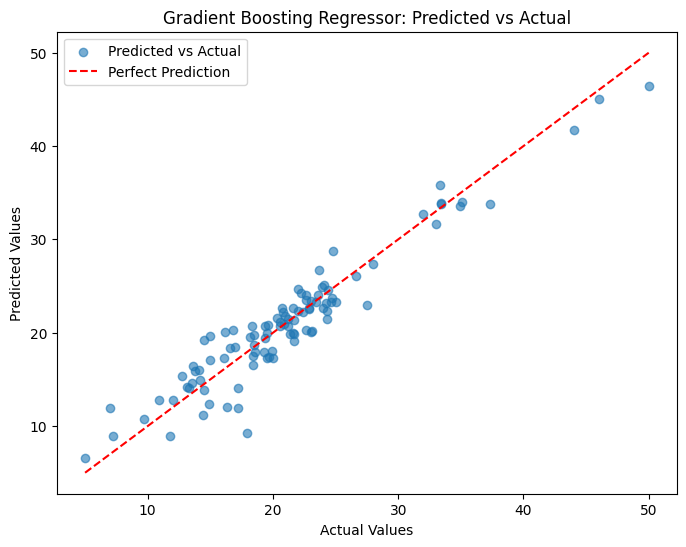

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Predicted vs Actual")
plt.legend()
plt.show()

# Residual plot

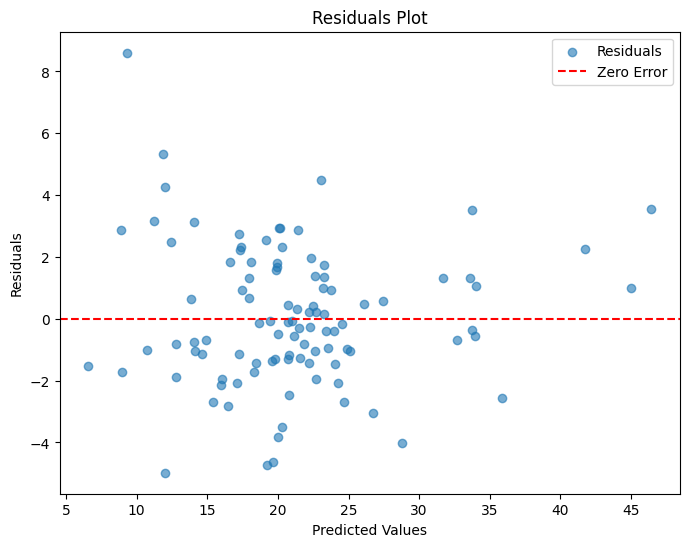

In [8]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6, label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Error")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()


# Distribution of Residuals

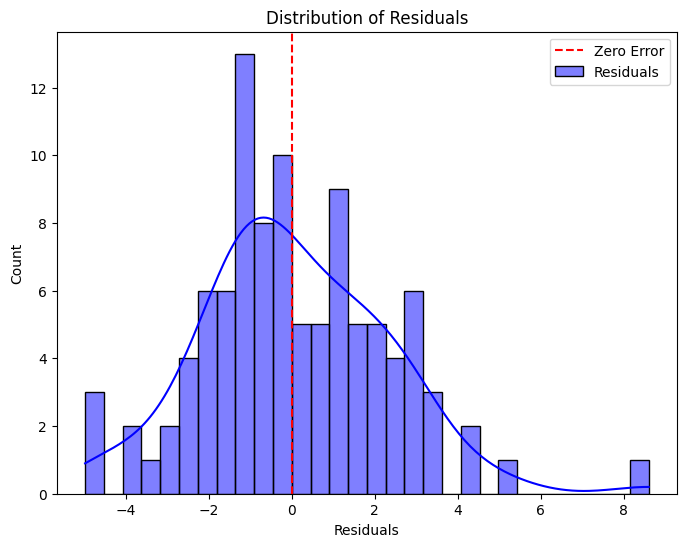

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', label="Residuals")
plt.axvline(x=0, color='r', linestyle='--', label="Zero Error")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()

# Feature Importance

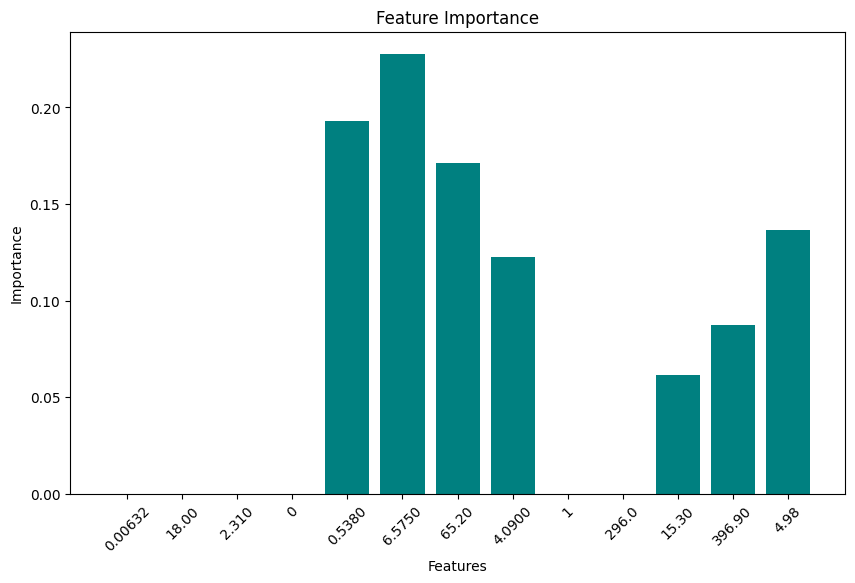

In [10]:
# Calculate feature importance using the last tree
last_tree = gbr.models[-1]
feature_importance = last_tree.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importance, color='teal')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


# Actual vs Predicted

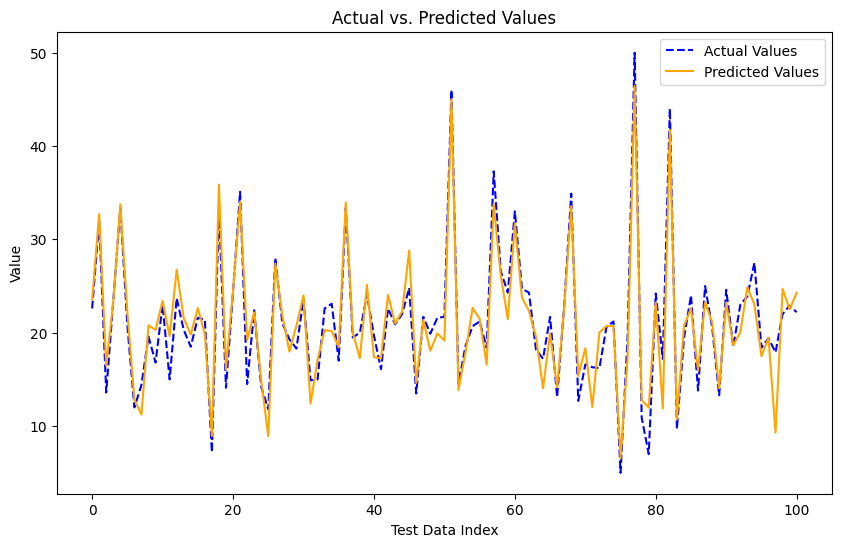

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Values", color="blue", linestyle="--")
plt.plot(predictions, label="Predicted Values", color="orange", linestyle="-")
plt.xlabel("Test Data Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


# Learning curve

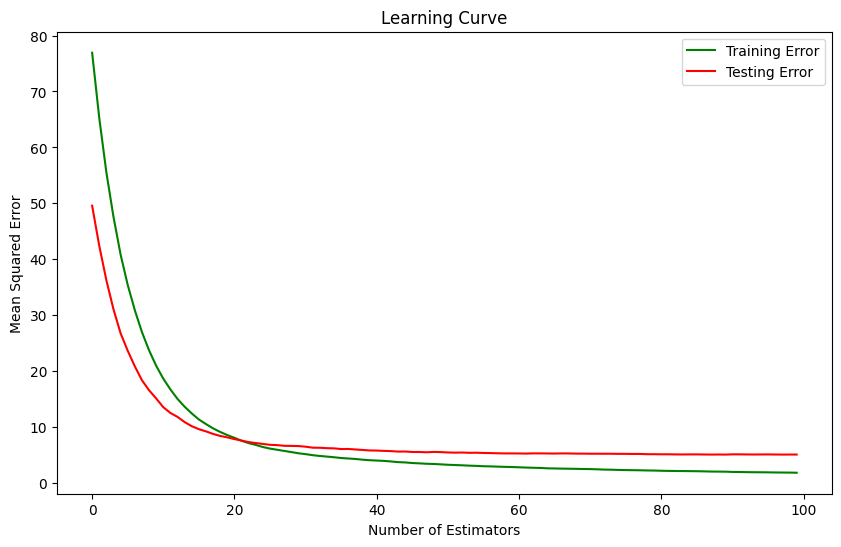

In [12]:
# Calculate learning curve
train_errors = []
test_errors = []
for i, tree in enumerate(gbr.models):
    partial_predictions = gbr.init_prediction + np.sum(
        [gbr.learning_rate * t.predict(X_train.values) for t in gbr.models[:i+1]], axis=0
    )
    train_errors.append(mean_squared_error(y_train, partial_predictions))

    partial_predictions_test = gbr.init_prediction + np.sum(
        [gbr.learning_rate * t.predict(X_test.values) for t in gbr.models[:i+1]], axis=0
    )
    test_errors.append(mean_squared_error(y_test, partial_predictions_test))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training Error", color="green")
plt.plot(test_errors, label="Testing Error", color="red")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()
